<a href="https://colab.research.google.com/github/luanakwon/GroundTemperature/blob/main/GroundTemp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
cols = ["YearMonthDayHourMinute","STN","Lon","Lat","isitu-LST","Band1","Band2","Band3","Band4","Band5","Band6","Band7","Band8","Band9","Band10","Band11","Band12","Band13","Band14","Band15","Band16","30daysBand3","30daysBand13","GK2A-LST","SolarZA","SateZA","ESR","Height","LandType","insitu-TA","insitu-HM","insitu-TD","insitu-TG","insitu-TED0.05","insitu-TED0.1","insitu-TED0.2","insitu-TED0.3","insitu-TED0.5","insitu-TED1.0","insitu-TED1.5","insitu-TED3.0","insitu-TED5.0","insitu-PA","insitu-PS"]
features = ["YearMonthDayHourMinute","STN","Lon","Lat",
           "Band1","Band2","Band3","Band4",
           "Band5","Band6","Band7","Band8",
           "Band9","Band10","Band11","Band12",
           "Band13","Band14","Band15","Band16",
           "30daysBand3","30daysBand13",
           "GK2A-LST","SolarZA","SateZA",
           "ESR",
           "LandType"]
targets = ["isitu-LST","insitu-TA"]

# Data Overview

In [ ]:
sample = pd.read_csv('20200101.LST.csv',header=0,names=cols)
sample.head()

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,Band1,Band2,Band3,Band4,Band5,...,insitu-TED0.1,insitu-TED0.2,insitu-TED0.3,insitu-TED0.5,insitu-TED1.0,insitu-TED1.5,insitu-TED3.0,insitu-TED5.0,insitu-PA,insitu-PS
0,202001010000,92,128.66670,38.06670,-999.0,-0.00057,0.00000,0.0003,-0.00030,0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,202001010000,93,127.75443,37.94738,-999.0,0.00000,0.00000,0.0003,0.00075,-0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,202001010000,95,127.30420,38.14787,-2.6,-0.00057,-0.00057,0.0003,-0.00060,-0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1014.1,1034.6
3,202001010000,96,131.86983,37.23952,-999.0,0.00000,0.00000,0.0000,0.00105,0.0000,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,202001010000,98,127.06070,37.90188,-3.1,0.00000,0.00000,0.0003,0.00060,-0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1019.6,1034.8


(104543, 44)
0.0 7.239350000000002
0.0 5.420450000000002


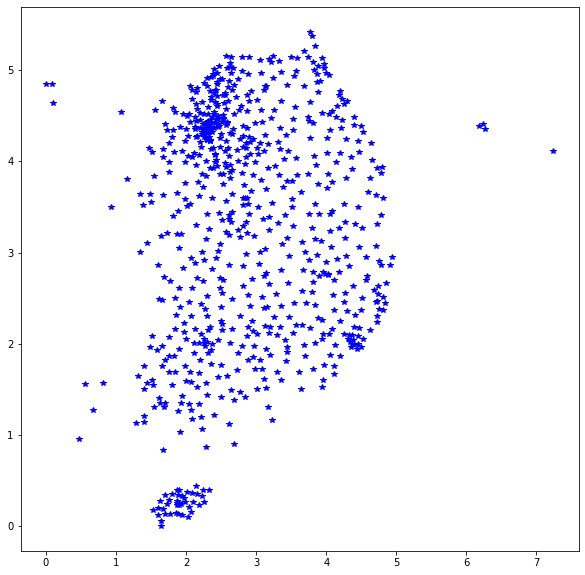

In [ ]:
print(sample.shape)
df = sample.iloc[:,1:4].drop_duplicates().to_numpy()
df[:,1:] -= [124.63048,33.12206]
print(min(df[:,1]),max(df[:,1]))
print(min(df[:,2]),max(df[:,2]))
plt.figure(figsize=(10,10))
plt.plot(df[:,1],df[:,2],'b*')
plt.show()

In [ ]:
for i in range(4,44):
  col = sample.loc[sample.iloc[:,i] > -999].iloc[:,i]
  if i == 28:
    print(f"{cols[i]} \t\tmin: {np.min(col)} \t\t\tmax: {np.max(col)} \t\t\tavg: {np.mean(col)} ")
  elif len(cols[i]) > 6:
    print(f"{cols[i]} \t\tmin: {np.min(col)} \t\tmax: {np.max(col)} \t\tavg: {np.mean(col)} ")
  else:
    print(f"{cols[i]} \t\t\tmin: {np.min(col)} \t\tmax: {np.max(col)} \t\tavg: {np.mean(col)} ")

isitu-LST 		min: -4.9 		max: 26.2 		avg: 0.27080945558739256 
Band1 			min: -0.00113 		max: 0.47359 		avg: 0.05738944055405184 
Band2 			min: -0.00114 		max: 0.48815 		avg: 0.054203694192665935 
Band3 			min: -0.00328 		max: 0.50395 		avg: 0.0484779530327403 
Band4 			min: -0.00254 		max: 0.5813 		avg: 0.059793412735871763 
Band5 			min: -0.00151 		max: 0.08579 		avg: 0.0038715424256143016 
Band6 			min: -0.00129 		max: 0.42633 		avg: 0.05491612221505149 
Band7 			min: 238.19384 		max: 308.08012 		avg: 271.8489144462853 
Band8 			min: 228.0943 		max: 245.40486 		avg: 238.82654382596303 
Band9 			min: 230.42801 		max: 254.45996 		avg: 248.05423254235814 
Band10 			min: 231.328 		max: 262.12081 		avg: 253.84858025438996 
Band11 			min: 233.6343 		max: 285.24053 		avg: 265.11799543090245 
Band12 			min: 229.78848 		max: 262.39371 		avg: 247.0980390755849 
Band13 			min: 234.30622 		max: 287.81421 		avg: 266.98636089782985 
Band14 			min: 233.11319 		max: 288.20345 		avg: 266.9280302948457

In [ ]:
df_LST = sample.loc[(sample['isitu-LST'] > -999)]
print(f"df size from {sample.shape} -> {df_LST.shape}")
df_TA = sample.loc[(sample['insitu-TA'] > -999)]
print(f"df size from {sample.shape} -> {df_TA.shape}")
df_LST_TA = sample.loc[(sample['isitu-LST'] > -999) | (sample['insitu-TA'] > -999)]
print(f"df size from {sample.shape} -> {df_LST_TA.shape}")

df size from (104543, 44) -> (13960, 44)
df size from (104543, 44) -> (13960, 44)
df size from (104543, 44) -> (13960, 44)


# Drop unlabeled data

In [ ]:
%%bash
STARTYEAR=2020
ENDYEAR=2021
for (( c=$STARTYEAR; c<=$ENDYEAR; c++ ))
do
  STARTMONTH=1
  ENDMONTH=12
  for (( d=$STARTMONTH; d<=$ENDMONTH; d++ ))
  do
    wget "https://bd.kma.go.kr/contest/resources/$c$(printf '%02d' $d).zip"
    unzip "/content/$c$(printf '%02d' $d).zip" -d "/content/data"
  done
done

In [ ]:
folderpath='data/'

for year in [2020]:
  for month in range(3,4):
    allmon = []
    for i in range(1,32):
      try:
        df = pd.read_csv(folderpath + '%d%02d%02d.LST.csv'%(year,month,i),names=cols)
      except FileNotFoundError:
        print('%d%02d%02d.LST.csv missing'%(year,month,i))
        continue
      # exclude testset
      if year==2021 and ((month==7 and 1<=i and i<=11) or (month==8 and 21<=i and i<=31)):
        continue

      len0 = df.shape[0]
      df = df.loc[(df['isitu-LST'] > -999) | (df['insitu-TA'] > -999)]
      len1 = df.shape[0]
      print(f"dropped {len0-len1}, concatenating {len1} from",'%d%02d%02d.LST.csv'%(year,month,i))
      allmon.append(df)
      
    if len(allmon) != 0:
      df_all = pd.concat(allmon)
      print('='*10 + ' %d%02d done '%(year,month) + '='*10 + f'  {df_all.shape}')
      df_all.to_csv('%d%02d.LST.csv'%(year,month),header=False, index=False)

# Gather test data

In [ ]:
%%bash
YEAR=2021
STARTMONTH=7
ENDMONTH=8
for (( d=$STARTMONTH; d<=$ENDMONTH; d++ ))
do
  wget "https://bd.kma.go.kr/contest/resources/$YEAR$(printf '%02d' $d).zip"
  unzip "/content/$YEAR$(printf '%02d' $d).zip" -d "/content/data"
done

In [ ]:
df = pd.read_csv('data/202107/20210701.LST.csv')
df.dtypes

In [ ]:
testsetcols = cols[:]
testsetcols.remove('isitu-LST')
testsetcols.remove('insitu-TA')
print(len(testsetcols))
testdays = {7:(1,11), 8:(21,31)}
folderpath = '/content/data/'
dfList = []
for month in [7, 8]:
  day0, day1 = testdays[month]
  for day in range(day0,day1+1):
    df = pd.read_csv(folderpath+'2021%02d/2021%02d%02d.LST.csv'%(month,month,day), usecols=testsetcols)
    dfList.append(df)
    print(f'appended {df.shape[0]}rows from '+'2021%02d/2021%02d%02d.LST.csv'%(month,month,day))
df_all = pd.concat(dfList)
print(f'{df_all.shape[0]} rows concatenated')

df_all.to_csv('test.LST.csv',header=False, index=False)
print('test.LST.csv saved')

In [ ]:
print(df_all.shape)

(54503, 27)


# Training

In [3]:
!gdown 1-EMhXFZJhzG7km6m75MoM3lsAVDpKji3
!mv 2yearsData.LST.csv train10M.csv

Downloading...
From: https://drive.google.com/uc?id=1-EMhXFZJhzG7km6m75MoM3lsAVDpKji3
To: /content/2yearsData.LST.csv
100% 3.51G/3.51G [00:45<00:00, 77.3MB/s]


In [4]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split
import joblib

In [5]:
RANDOM_STATE = 31415
target = targets[:1] # isitu-LST
timecol = features[:1] # time column
featureInUse = features[1:] # excluding time column
# sample fraction of train data
fraction = 0.005 # 0.0 ~ 1.0

In [6]:
df = pd.read_csv(f'/content/train10M.csv',usecols=timecol+featureInUse+target)
print(df.shape)

(10583013, 28)


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df.loc[:,timecol+featureInUse],df.loc[:,target], test_size=0.2*fraction, train_size=0.8*fraction, 
    random_state=RANDOM_STATE, shuffle=True, stratify=None)
print(f"{X_train.shape[0]} train values, {X_test.shape[0]} test values out of {df.shape[0]} values")
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

42332 train values, 10584 test values out of 10583013 values
(42332, 27)
(10584, 27)
(42332, 1)
(10584, 1)


In [22]:
# Trying to split YMDH to 4 different columns
for df_subset in [X_train, X_test]:
  YMDH = pd.to_datetime(df_subset[timecol[0]])
  df_subset.insert(0,'Hour',YMDH.dt.hour)
  df_subset.insert(0,'Day',YMDH.dt.day)
  df_subset.insert(0,'Month',YMDH.dt.month)
  df_subset.insert(0,'Year',YMDH.dt.year)
  df_subset.drop(columns=timecol[0], inplace=True)

for df_subset in [X_train, X_test, Y_train, Y_test]:
  print(df_subset.shape)

(42332, 30)
(10584, 30)
(42332, 1)
(10584, 1)


**WARNING! training all 3 models at the same time will require LARGE amount of memory**

## Random Forest Regressor

In [ ]:
RFR_model = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=1.0, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=False, 
    n_jobs=None, 
    random_state=RANDOM_STATE, 
    verbose=1, 
    warm_start=False, 
    ccp_alpha=0.0, 
    max_samples=None
)

In [ ]:
RFR_model.fit(X_train, Y_train.values.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.4min finished


RandomForestRegressor(max_features=1.0, random_state=31415, verbose=1)

In [ ]:
prediction = RFR_model.predict(X_test)
diff = prediction - Y_test.values.ravel()
loss = np.sqrt(np.mean(diff**2))
print(f'RMSE loss {loss}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE loss 3.6826393831924946


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


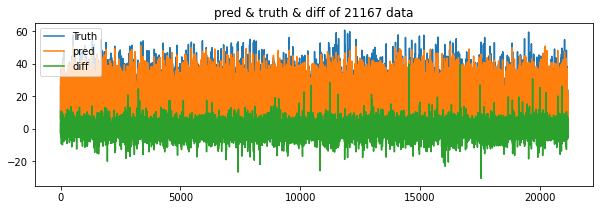

In [ ]:
plt.figure(figsize=(10,3))
plt.title(f'pred & truth & diff of {X_test.shape[0]} data')
plt.plot(Y_test.values.ravel(), label='Truth')
plt.plot(prediction,label='pred')
plt.plot(diff,label='diff')
plt.legend()
plt.show()

In [ ]:
# save model
joblib.dump(RFR_model, f'RFR_{fraction}') 

['RFR_202001']

## Gradient Boosting Regressor

In [ ]:
GBR_model = GradientBoostingRegressor(
    loss='squared_error', 
    learning_rate=0.1, 
    n_estimators=200, 
    subsample=1.0, 
    criterion='friedman_mse', 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_depth=3, 
    min_impurity_decrease=0.0, 
    init=None, 
    random_state=RANDOM_STATE, 
    max_features=None, 
    alpha=0.9, # only for huber loss or quantile loss
    verbose=1, 
    max_leaf_nodes=None, 
    warm_start=False, # resume from previous fit
    validation_fraction=0.1, 
    n_iter_no_change=30, # n of iters with no improvement
    tol=0.0001, 
    ccp_alpha=0.0
)

In [ ]:
GBR_model.fit(X_train,Y_train.values.ravel())

      Iter       Train Loss   Remaining Time 
         1         115.6347            2.16m
         2          99.8568            1.94m
         3          86.8791            1.87m
         4          76.3430            1.82m
         5          67.6314            1.80m
         6          60.5036            1.78m
         7          54.4496            1.77m
         8          49.4818            1.75m
         9          45.4581            1.74m
        10          42.0050            1.73m
        20          27.4036            1.63m
        30          23.1016            1.52m
        40          20.8544            1.42m
        50          19.3543            1.33m
        60          18.4296            1.23m
        70          17.7658            1.14m
        80          17.2512            1.06m
        90          16.8288           57.95s
       100          16.4358           52.60s
       200          14.3885            0.00s


GradientBoostingRegressor(n_estimators=200, n_iter_no_change=30,
                          random_state=31415, verbose=1)

In [ ]:
prediction = GBR_model.predict(X_test)
diff = prediction - Y_test.values.ravel()
loss = np.sqrt(np.mean(diff**2))
print(f'RMSE loss {loss}')

RMSE loss 3.9008046385672372


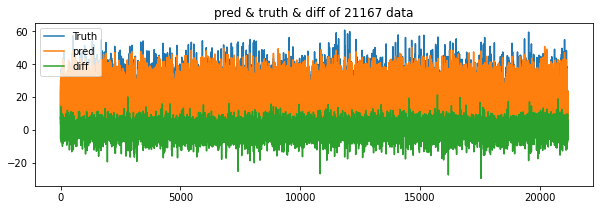

In [ ]:
plt.figure(figsize=(10,3))
plt.title(f'pred & truth & diff of {X_test.shape[0]} data')
plt.plot(Y_test.values.ravel(), label='Truth')
plt.plot(prediction,label='pred')
plt.plot(diff,label='diff')
plt.legend()
plt.show()

In [ ]:
# save model
joblib.dump(GBR_model, f'GBR_{fraction}') 

## Adaboost Regressor

In [ ]:
AR_model = AdaBoostRegressor(
    base_estimator=None,
    n_estimators=50, 
    learning_rate=1.0, 
    loss='square', 
    random_state=RANDOM_STATE
)

In [ ]:
AR_model.fit(X_train,Y_train.values.ravel())

AdaBoostRegressor(loss='square', random_state=31415)

In [ ]:
prediction = AR_model.predict(X_test)
diff = prediction - Y_test.values.ravel()
loss = np.sqrt(np.mean(diff**2))
print(f'RMSE loss {loss}')

RMSE loss 6.375204286914479


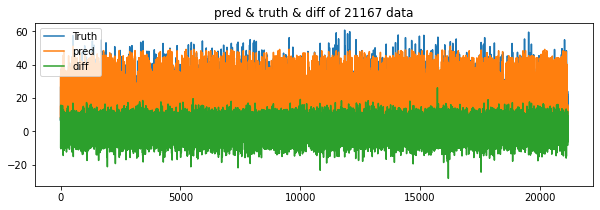

In [ ]:
plt.figure(figsize=(10,3))
plt.title(f'pred & truth & diff of {X_test.shape[0]} data')
plt.plot(Y_test.values.ravel(), label='Truth')
plt.plot(prediction,label='pred')
plt.plot(diff,label='diff')
plt.legend()
plt.show()

In [ ]:
# save model
joblib.dump(GBR_model, f'AR_{fraction}') 

# save dataset to drive

In [ ]:
!cp /content/drive/MyDrive/Dataset/GroundTemp/* /content/train/.

In [ ]:
!zip /content/train.zip /content/train/*

  adding: content/train/202001.LST.csv (deflated 69%)
  adding: content/train/202002.LST.csv (deflated 68%)
  adding: content/train/202003.LST.csv (deflated 68%)
  adding: content/train/202004.LST.csv (deflated 68%)
  adding: content/train/202005.LST.csv (deflated 67%)
  adding: content/train/202006.LST.csv (deflated 67%)
  adding: content/train/202007.LST.csv (deflated 67%)
  adding: content/train/202008.LST.csv (deflated 67%)
  adding: content/train/202009.LST.csv (deflated 68%)
  adding: content/train/202010.LST.csv (deflated 68%)
  adding: content/train/202011.LST.csv (deflated 68%)
  adding: content/train/202101.LST.csv (deflated 70%)
  adding: content/train/202102.LST.csv (deflated 69%)
  adding: content/train/202103.LST.csv (deflated 68%)
  adding: content/train/202104.LST.csv (deflated 68%)
  adding: content/train/202105.LST.csv (deflated 68%)
  adding: content/train/202106.LST.csv (deflated 67%)
  adding: content/train/202109.LST.csv (deflated 68%)
  adding: content/train/2021

In [ ]:
!cp train.zip /content/drive/MyDrive/Dataset/GroundTemp/.